In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Pomegranate.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2167 non-null   object 
 1   precio_venta    2144 non-null   float64
 2   peso            2167 non-null   float64
 3   t_id            2167 non-null   object 
 4   fecha_venta     2157 non-null   object 
 5   hora_venta      2157 non-null   object 
 6   tipo            2167 non-null   object 
 7   fecha_recogida  2167 non-null   object 
 8   hora_recogida   2167 non-null   object 
 9   lote            2167 non-null   object 
 10  marca           2167 non-null   object 
 11  coste_inicial   2109 non-null   float64
 12  proveedor       2167 non-null   object 
dtypes: float64(3), object(10)
memory usage: 220.2+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2144.000000  2167.000000    2109.000000
mean       3.504110   303.568853       1.984578
std        0.701436   101.312237       0.491870
min        1.208041   -78.698280       0.328565
25%        3.038374   235.288430       1.643053
50%        3.508414   304.528484       1.977733
75%        3.976642   373.157173       2.311847
max        5.887695   635.020759       3.582209


In [ ]:
print(df.head())

         cliente  precio_venta        peso                  t_id fecha_venta  \
0  CompraMaestra      4.297327  373.064912  Pomegranet001012.png  2022/09/09   
1  CompraMaestra      2.808941  352.180603  Pomegranet001041.png  2022/09/09   
2  CompraMaestra      2.516760   98.184616    Pomegranet0011.png  2022/09/14   
3  CompraMaestra      3.294422  201.441263  Pomegranet001151.png  2022/09/16   
4  CompraMaestra      3.350630  317.201321  Pomegranet001182.png  2022/09/25   

  hora_venta         tipo fecha_recogida hora_recogida  \
0      23:00  Pomegranate     2022/09/09         16:00   
1      18:00  Pomegranate     2022/09/09         08:00   
2      02:00  Pomegranate     2022/09/14         01:00   
3      20:00  Pomegranate     2022/09/16         20:00   
4      17:00  Pomegranate     2022/09/25         09:00   

                             lote            marca  coste_inicial  \
0  V79S69M82G78K84L48M48M50J80T71  ExquisitoJardín       2.349728   
1  V79S69M82G78K84L48M48P49J80T7

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -78.69828021454282
Peso máximo: 635.0207588619808
Total negativos: 5
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
SinfoníaDelicias,1
TropicalSabor,1
SaborNativo,1
GourmetFrutas,1
VibranteSabores,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Agricultura Inteligente TechCultivos,1
Pecuaria Moderna Alcaraz,1
Productos Lácteos EcoLeche,1
Vivero Verde Esperanza,1
BioCosecha Orgánica,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['V79S69M82G78K84L48N48M55J80T71', 'V79S69M82G78K84L48M48U46V78M',
       'V79S69M82G78K84L48O54N46V78M', 'V79S69M82G78K84L48P48R46V78M',
       'V79S69M82G78K84L48M52L55J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes V79S69M82G78K84L48.

In [ ]:
print(negativos["peso"])

724    -12.341413
1520    -2.865499
1629   -78.698280
1630   -44.419716
1859    -5.093018
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                     cliente  precio_venta       peso                  t_id  \
724        La Ruta del Sabor      3.816980 -12.341413  Pomegranet002017.png   
1520  Distribuidora Nacional      3.197840  -2.865499   Pomegranet00109.png   
1629      Delicias del Campo      2.699992 -78.698280   Pomegranet00362.png   
1630      Delicias del Campo      3.706663 -44.419716   Pomegranet00406.png   
1859        SuperValle Verde      3.083600  -5.093018  Pomegranet001407.png   

     fecha_venta hora_venta         tipo fecha_recogida hora_recogida  \
724   2022/09/25      05:00  Pomegranate     2022/09/24         21:00   
1520  2022/09/29      17:00  Pomegranate     2022/09/29         08:00   
1629  2022/09/06      14:00  Pomegranate     2022/09/06         07:00   
1630  2022/09/26      00:00  Pomegranate     2022/09/25         20:00   
1859  2022/09/15      02:00  Pomegranate     2022/09/14         23:00   

                                lote             marca  coste_inicial  \
724   V79S69M

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 304 g:", len(df[df['peso'] > 304]))
print("Peso máximo:", df.loc[df['peso'] > 304, 'peso'].max())

Cantidad de pesos mayores de 304 g: 1089
Peso máximo: 635.0207588619808


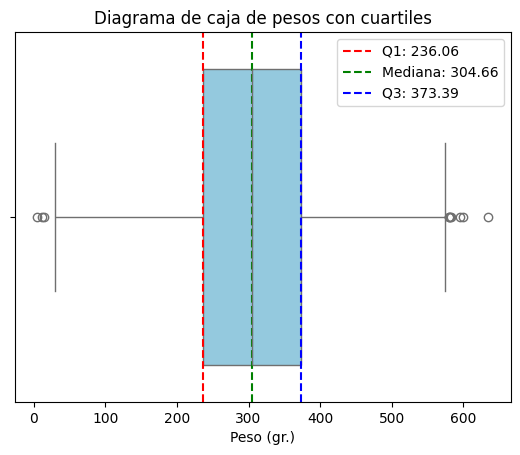

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

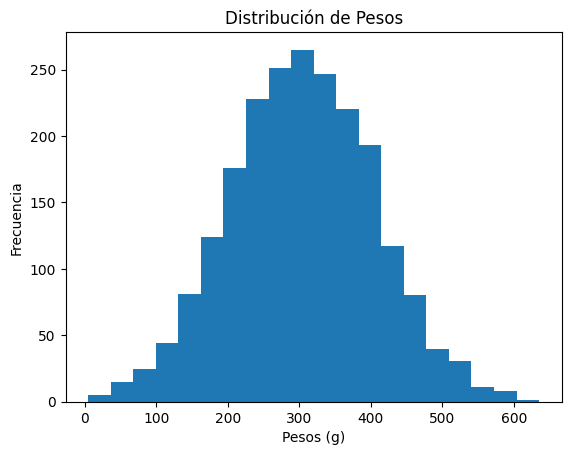

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 7
236.05969465248722
373.3870118300037
137.32731717751648


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso                  t_id
1646    4.998899    Pomegranet0081.png
1190   11.869938   Pomegranet00621.png
1964   13.890903   Pomegranet00545.png
939    30.155808   Pomegranet00500.png
1765   34.108516   Pomegranet00465.png
...          ...                   ...
998   581.249791   Pomegranet00393.png
1347  582.721838  Pomegranet001233.png
1371  595.178333  Pomegranet002042.png
912   600.139051  Pomegranet001623.png
200   635.020759  Pomegranet001143.png

[2162 rows x 2 columns]


El peso medio de una granada esta entre 200 y 400 gramos.

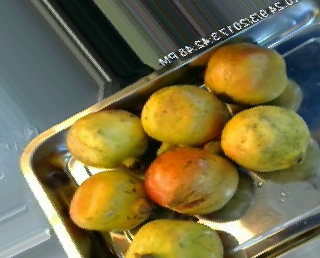

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Pomegranate/Pomegranet0081.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

Si cogemos la imagen con el peso minimo podemos ver que hay 7 granadas pesando entre todas ellas 4.998899 gr.

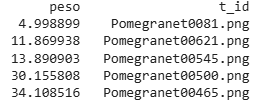

De entre todos los pesos de la tabla anterior podemos ver que todos son pesos muy bajos y además todas las imagenes contienen más de una sola unidad de fruta.
Esto mostraria que los pesos son inconsistentes.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.3285653170219273
Coste inicial máximo: 3.582209094100727
Coste inicial negativos: 0
Coste inicial nulos: 58


No encontramos negativos y los costes iniciales van desde los 0.32 hasta los 3.58


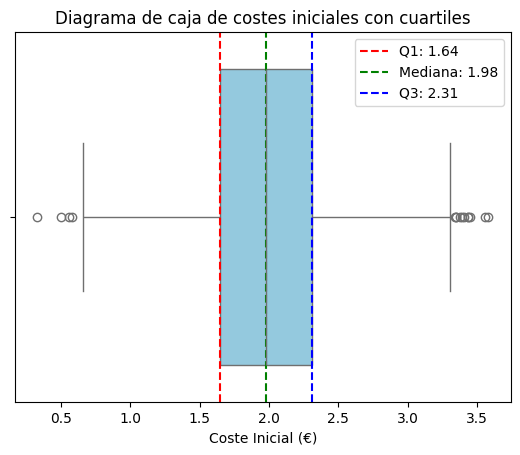

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

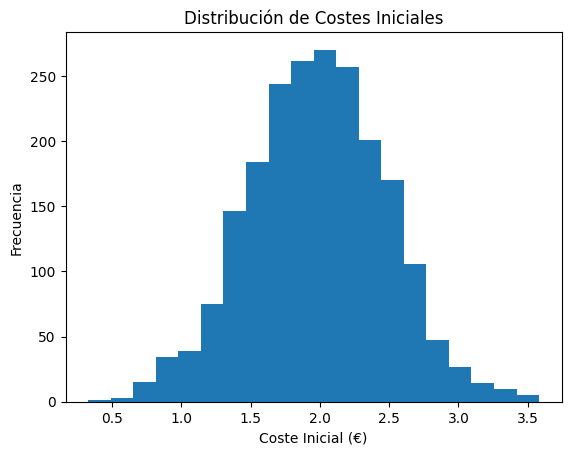

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 11
1.6430531661100258
2.311846770044254
0.6687936039342284


Una vez analizados los costes iniciales y viendo que tenemos 11 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.2080405398594385
Precio venta máximo: 5.887695494489533
Total negativos: 0
Total nulos: 23


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 23 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

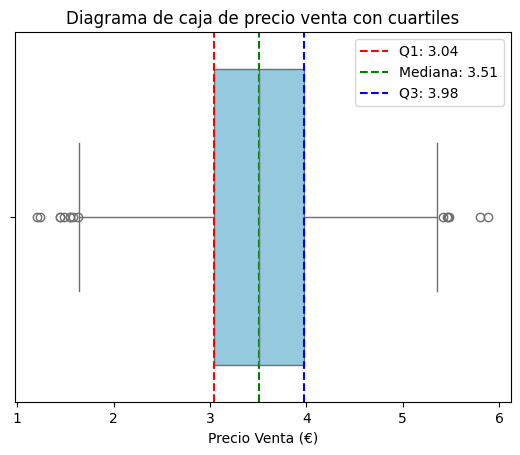

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

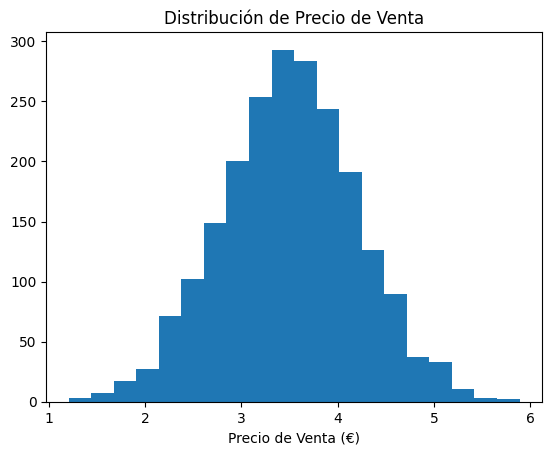

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)


Total outliers: 6
3.0383736614783072
3.976641762666635


En precio venta tenemos 6 outliers mientras que en coste inicial teníamos 11.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,La Canasta Feliz,5.887695,398.970931,Pomegranet001009.png,2022/09/09,06:00,Pomegranate,2022/09/08,23:00,V79S69M82G78K84L48M48L57J80T71,...,398.970931,2022/09/09,06:00,Pomegranate,2022/09/08,23:00,V79S69M82G78K84L48M48L57J80T71,ExóticoManjar,3.582209,EcoFungicidas Morales
1,MegaAhorro,5.798421,304.492421,Pomegranet001729.png,2022/09/24,23:00,Pomegranate,2022/09/24,19:00,V79S69M82G78K84L48M55N57J80T71,...,304.492421,2022/09/24,23:00,Pomegranate,2022/09/24,19:00,V79S69M82G78K84L48M55N57J80T71,MaravillaJugosa,3.560377,Pecuaria Moderna Alcaraz


2 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-25 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
1814,-25 days
1536,-25 days
901,-24 days
1436,-23 days
1462,-21 days
...,...
1323,NaT
1568,NaT
1631,NaT
1938,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de granadas a un proveedor en un solo día.

**En el caso de las granadas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las manzanas no encontramos más de un tipo de fruta ni más de una marca.
**En el caso de las granadas esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.685310,-0.613311
precio_venta,0.685310,1.000000,0.076037
rentabilidad,-0.613311,0.076037,1.000000


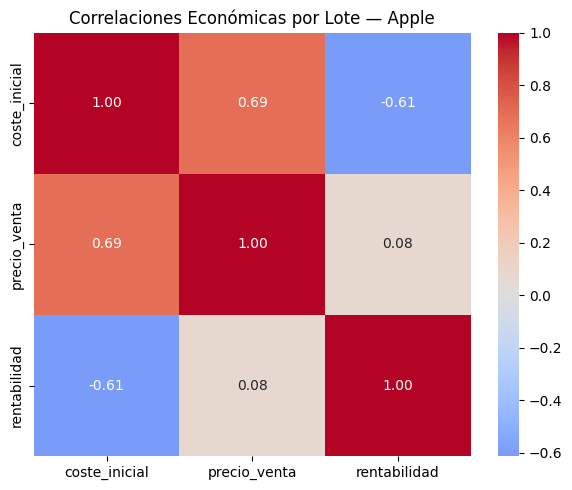

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Apple')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.685310  0.020605
coste_inicial      0.685310       1.000000 -0.004909
peso               0.020605      -0.004909  1.000000


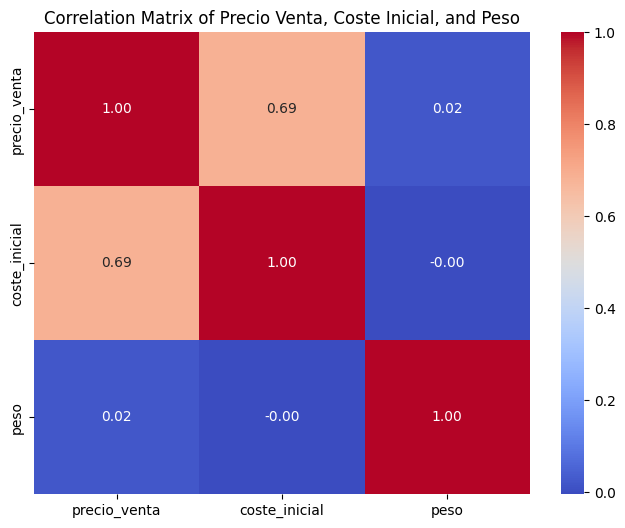

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.69 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.



Aqui dejamos el analisis de las granadas y pasamos a analizar la siguiente fruta.